In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np


## Mejor modelo: 
#### 1 - LinearRegression
#### 2 - KNeighborsRegressor
#### 3 - RandomForestRegressor
#### 4 - XGBRegressor

reg1 

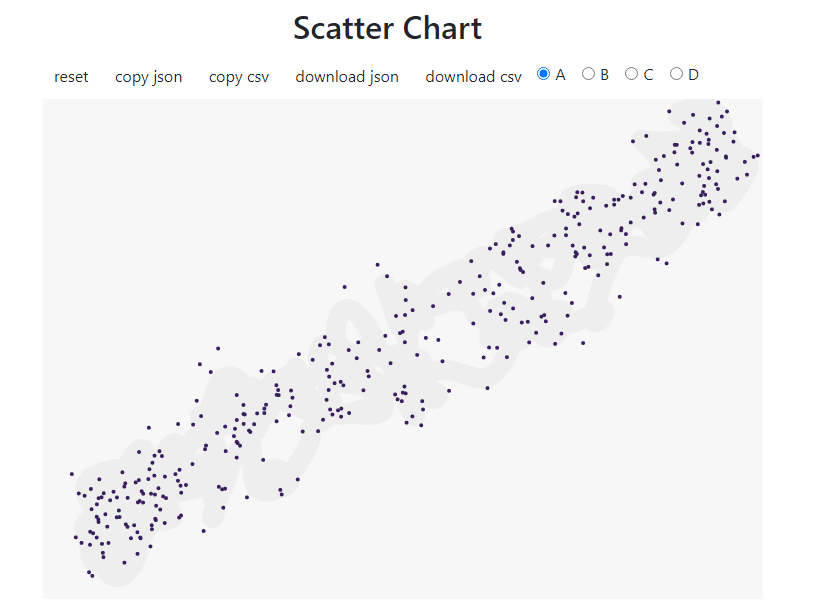


reg2 

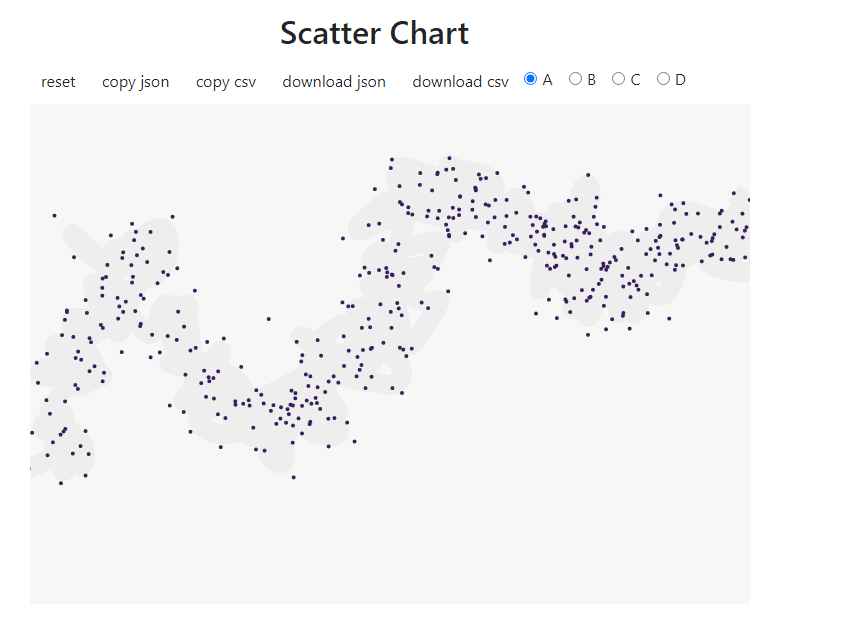


reg3 

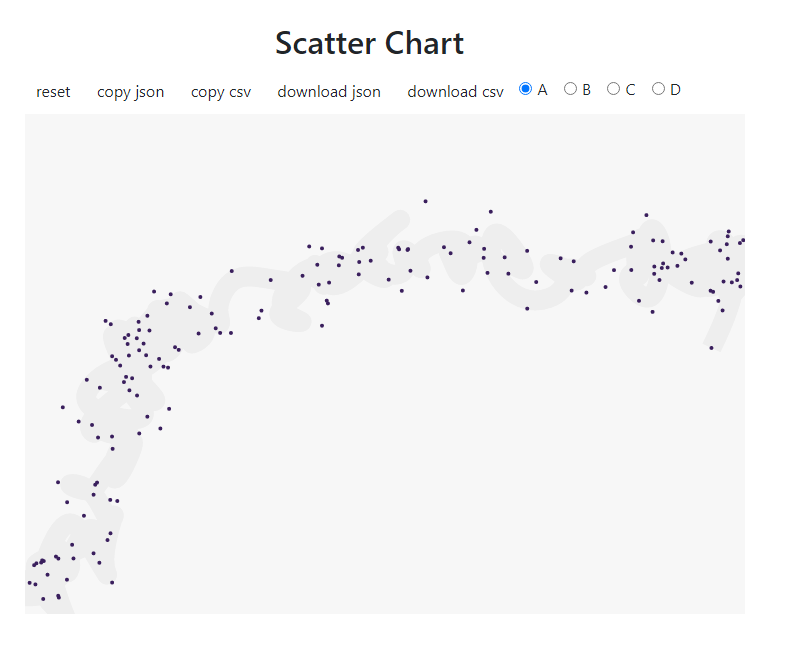


In [16]:
def train_linear_regression(X_train, y_train):
    # Entrenar modelo de regresión lineal
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model

def train_knn_regressor(X_train, y_train):
    # Entrenar modelo de KNN para regresión
    knn_model = KNeighborsRegressor(n_neighbors=20)
    knn_model.fit(X_train, y_train)
    return knn_model

def train_random_forest_regressor(X_train, y_train):
    rf_model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=3)
    rf_model.fit(X_train, y_train)
    return rf_model

def train_xgboost_regressor(X_train, y_train):
    # Entrenar modelo de XGBoost para regresión
    xgb_model = xgb.XGBRegressor(n_estimators=40, learning_rate=0.1, max_depth=4, random_state=0, alpha=0.5)
    xgb_model.fit(X_train, y_train)
    return xgb_model

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    # Calcular el R^2 en el conjunto de entrenamiento
    train_r2 = model.score(X_train, y_train)

    # Realizar predicciones en los datos de prueba y calcular el R^2 y el MSE
    y_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return train_r2, test_r2, mse, rmse, mae

def plot_residuals(y_test, y_pred, model_name):
    # Graficar residuos para un modelo dado
    residuals = y_test - y_pred
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel("True values")
    plt.ylabel("Residuals")
    plt.title("Residuals plot - " + model_name)
    plt.show()


def plot_predictions_vs_true(y_true, y_pred, model_name):
    # Graficar predicciones vs valores reales para un modelo dado
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("True values")
    plt.ylabel("Predicted values")
    plt.title("Predictions vs True values - " + model_name)
    plt.show()


def plot_feature_vs_predictions_and_true(X_test, y_true, y_pred, model_name):
    # Graficar variable independiente vs predicciones y valores reales, diferenciados por color
    plt.figure(figsize=(5,5))
    plt.scatter(X_test, y_true, label="True values", color='blue', alpha=0.5)
    plt.scatter(X_test, y_pred, label="Predicted values", color='red', alpha=0.5)
    plt.xlabel("Independent variable (x)")
    plt.ylabel("Dependent variable (y)")
    plt.title("Independent variable vs Predictions and True values - " + model_name)
    plt.legend()
    plt.show()

    
def split_data(X, y, test_size=0.2, random_state=42):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [17]:
# Leer los conjuntos de datos
df1 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg1.csv')
df2 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg2.csv')
df3 = pd.read_csv('/workspaces/predictive_maintenance/data/other/reg3.csv')




In [18]:
df1.describe()

,x,y
count,360.000000,360.000000
mean,362.356608,254.713130
std,212.958174,129.096743
min,28.863351,-3.249029
25%,157.803674,138.389022
50%,361.686534,249.785827
75%,551.469954,370.623198
max,714.746668,496.471810


Dataset 1:

Model: Linear Regression
Train R^2: 0.9154
Test R^2: 0.9178
MSE: 1362.1000
RMSE: 36.9066
MAE: 30.7690


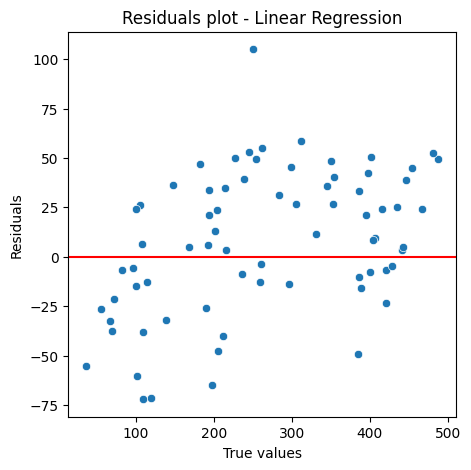

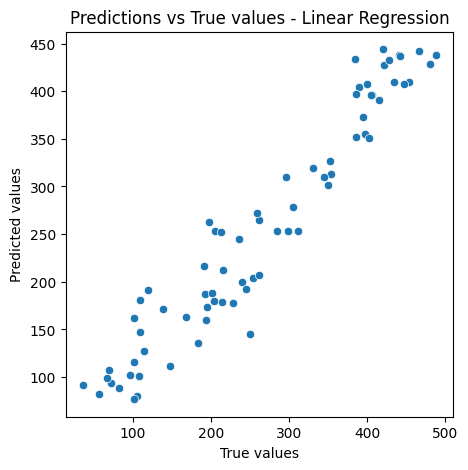

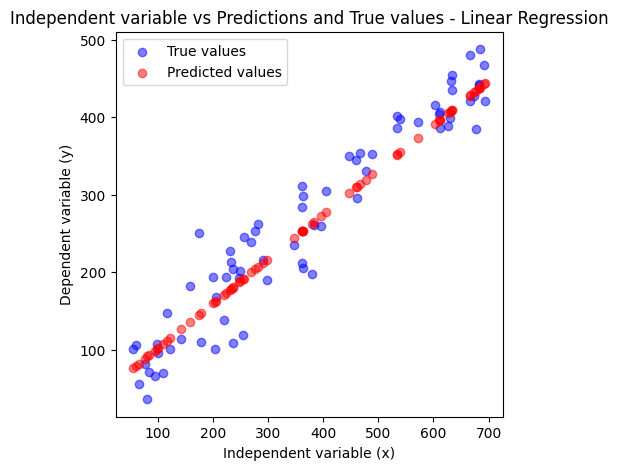


Model: KNN Regressor
Train R^2: 0.9216
Test R^2: 0.9175
MSE: 1366.7124
RMSE: 36.9691
MAE: 30.9967


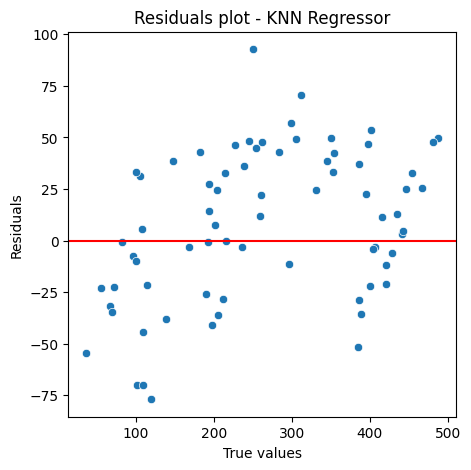

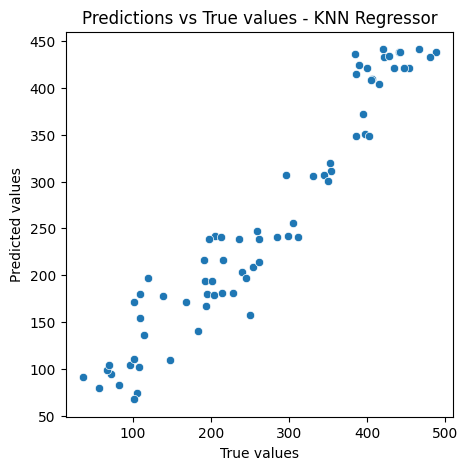

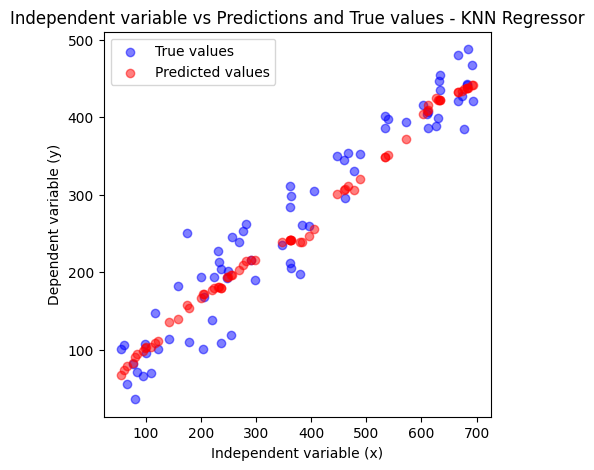


Model: Random Forest Regressor
Train R^2: 0.9261
Test R^2: 0.9093
MSE: 1502.2994
RMSE: 38.7595
MAE: 31.7866


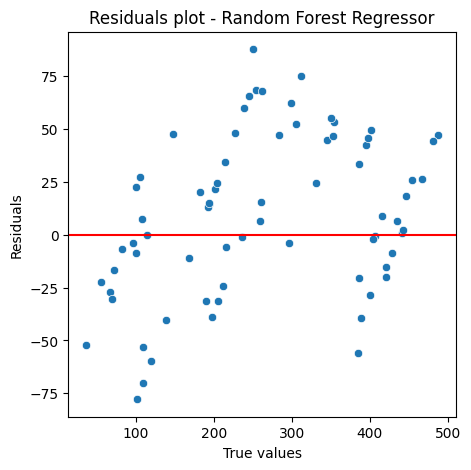

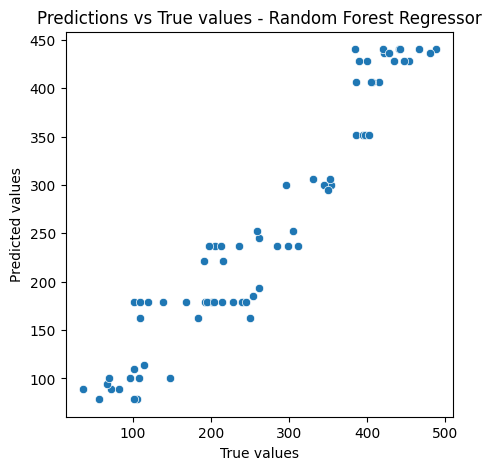

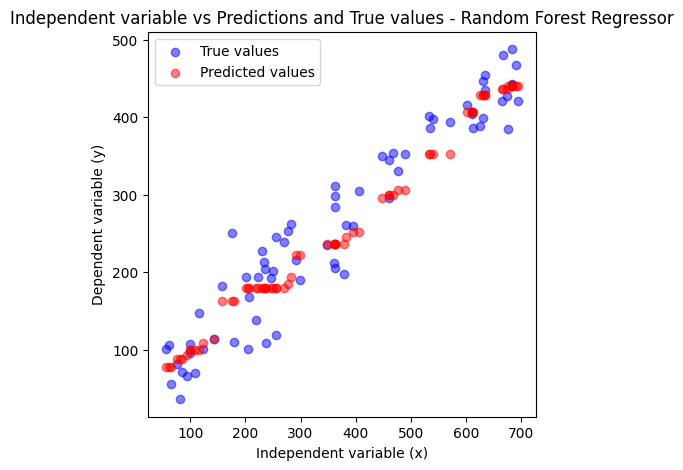


Model: XGBoost Regressor
Train R^2: 0.9457
Test R^2: 0.8936
MSE: 1761.8502
RMSE: 41.9744
MAE: 33.9856


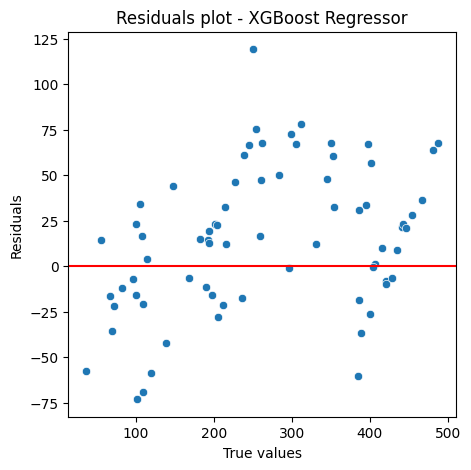

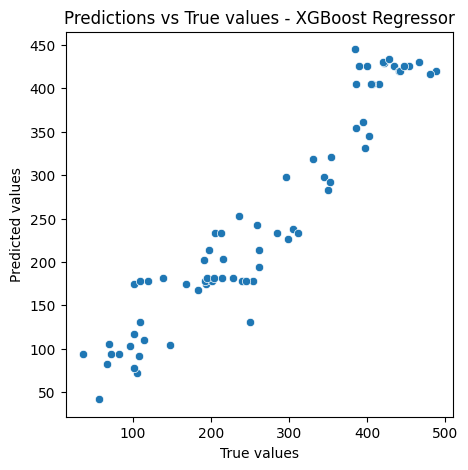

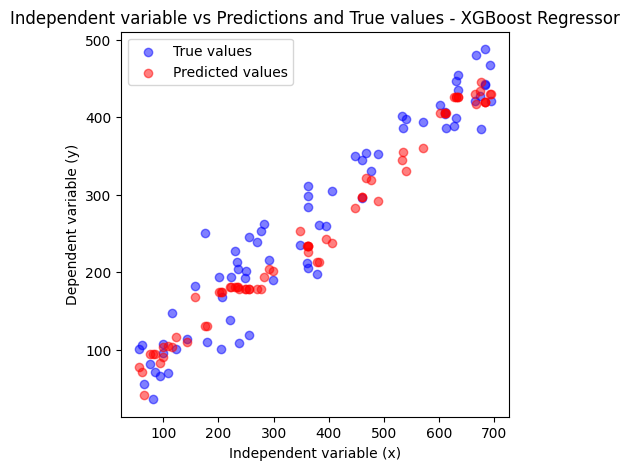



Dataset 2:

Model: Linear Regression
Train R^2: 0.3498
Test R^2: 0.3581
MSE: 3178.9639
RMSE: 56.3823
MAE: 44.5435


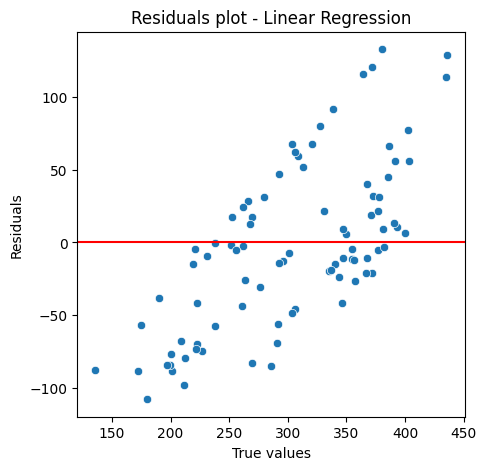

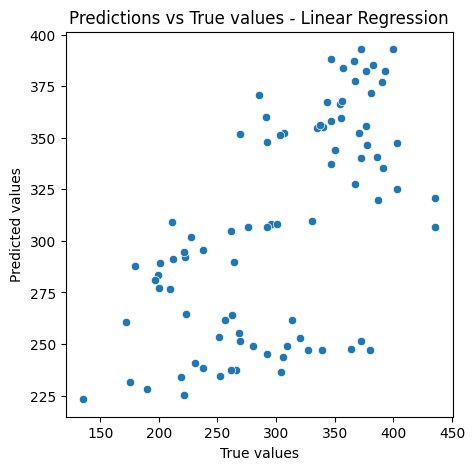

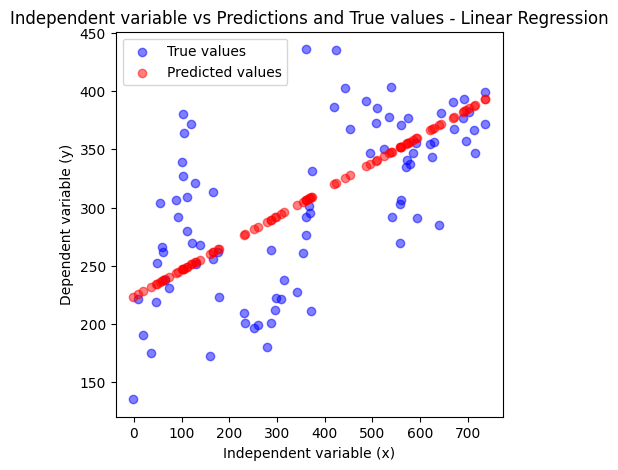


Model: KNN Regressor
Train R^2: 0.7180
Test R^2: 0.6690
MSE: 1639.4880
RMSE: 40.4906
MAE: 30.2246


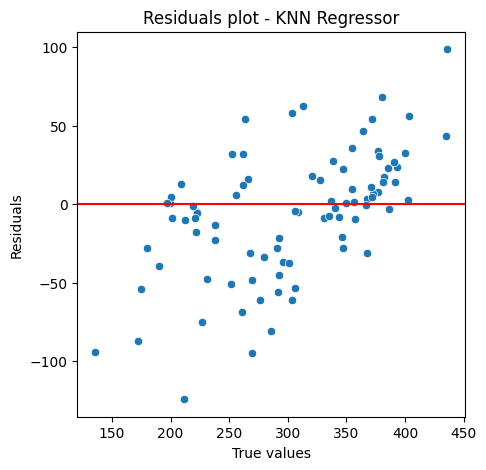

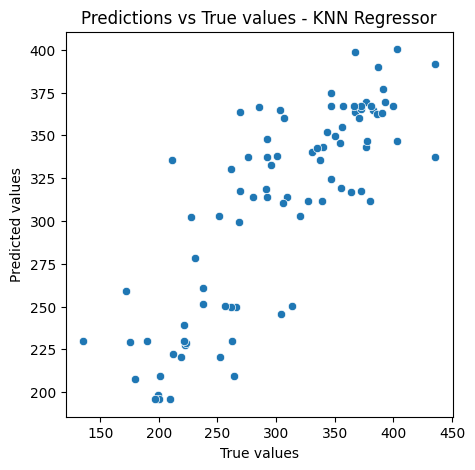

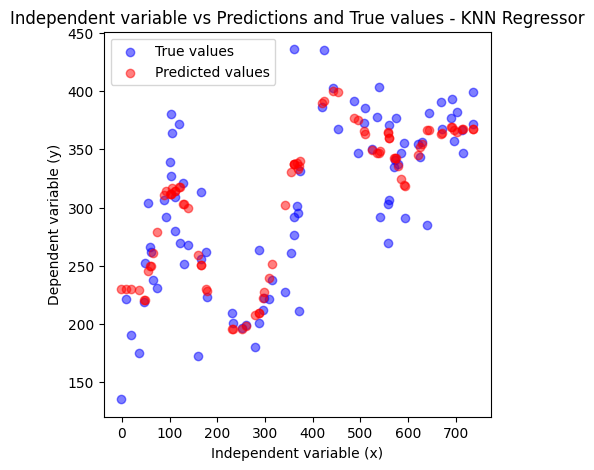


Model: Random Forest Regressor
Train R^2: 0.7330
Test R^2: 0.6450
MSE: 1757.9915
RMSE: 41.9284
MAE: 32.1154


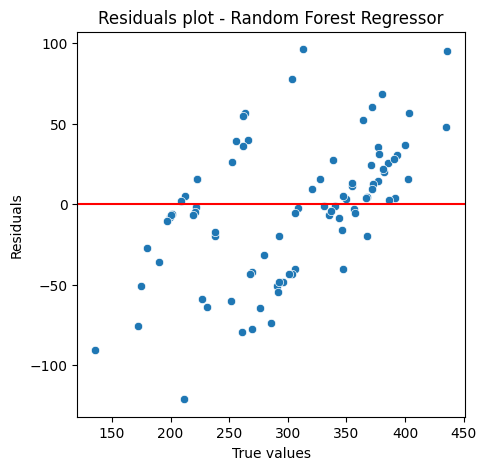

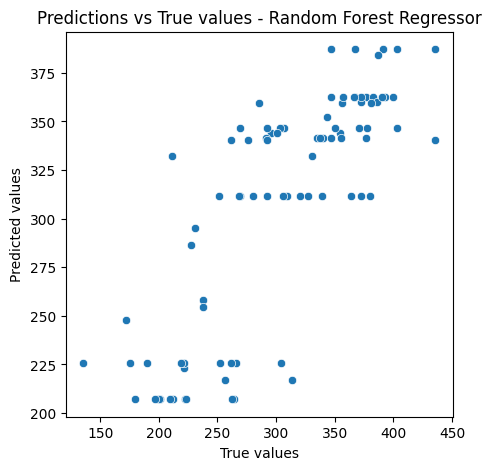

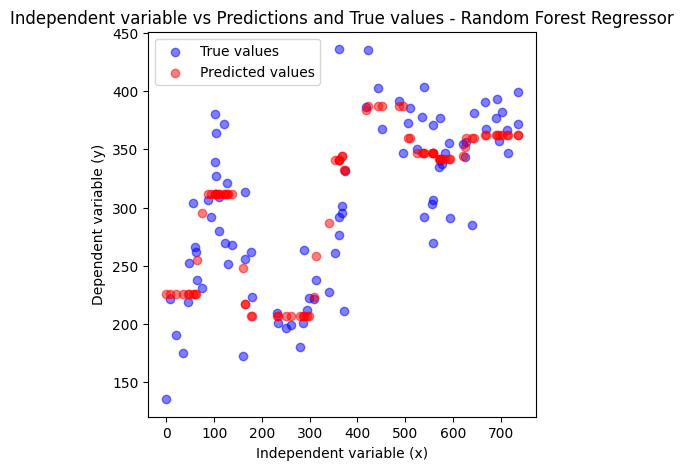


Model: XGBoost Regressor
Train R^2: 0.8012
Test R^2: 0.6374
MSE: 1795.7127
RMSE: 42.3759
MAE: 33.9947


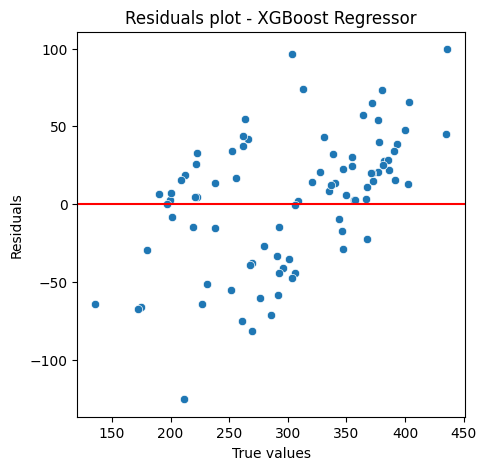

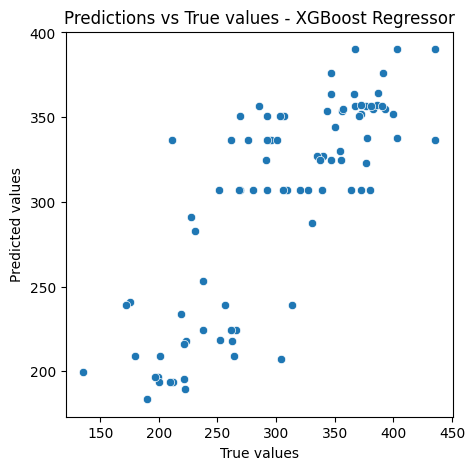

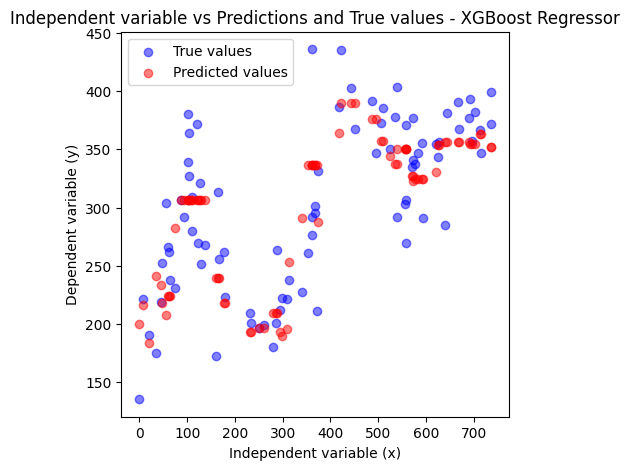



Dataset 3:

Model: Linear Regression
Train R^2: 0.5171
Test R^2: 0.6080
MSE: 5910.2874
RMSE: 76.8784
MAE: 61.4543


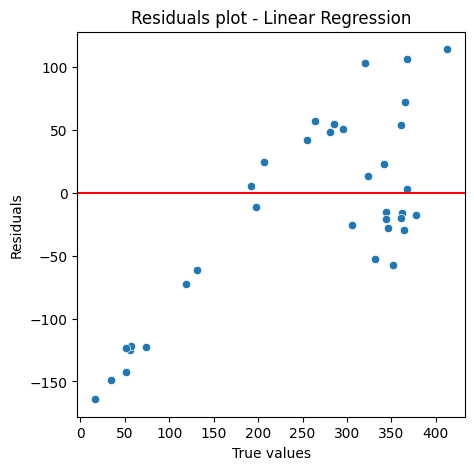

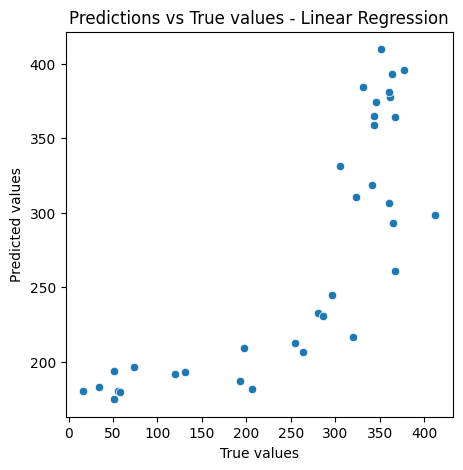

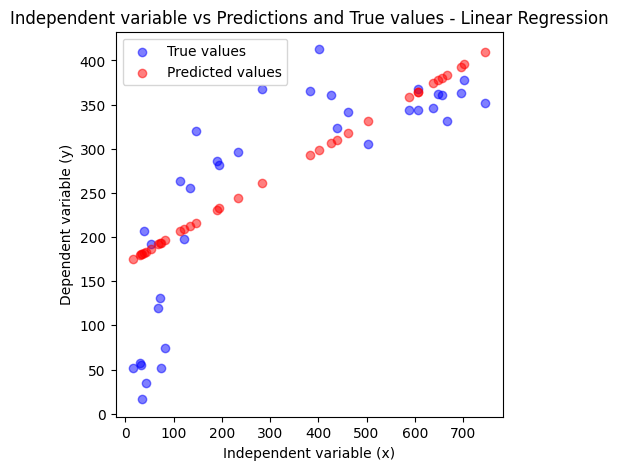


Model: KNN Regressor
Train R^2: 0.8526
Test R^2: 0.8478
MSE: 2295.2576
RMSE: 47.9088
MAE: 33.0202


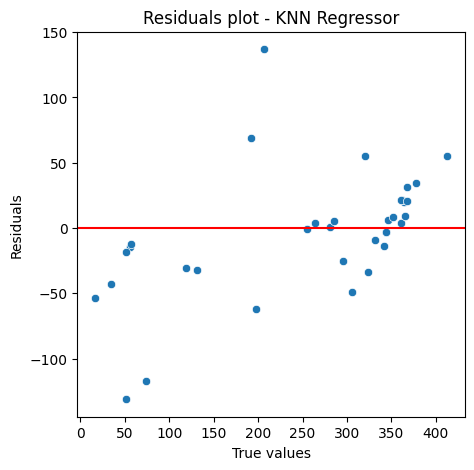

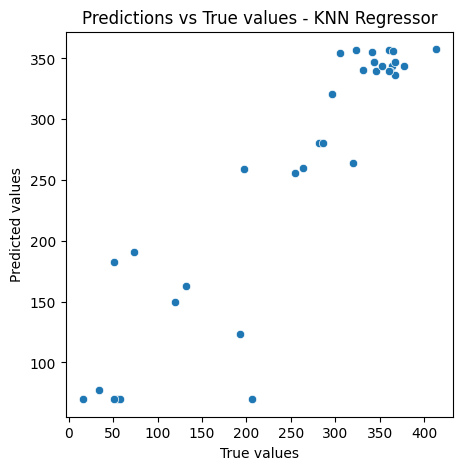

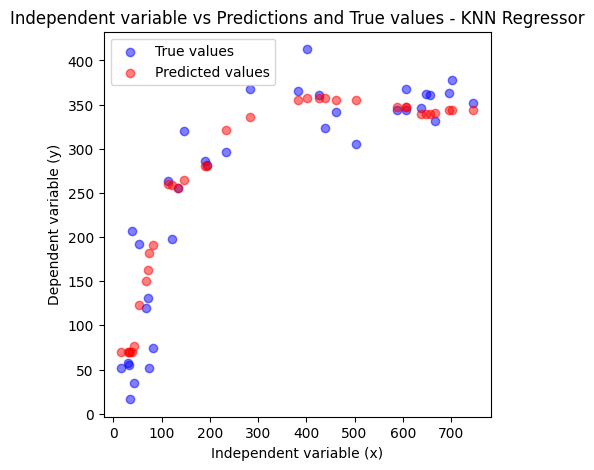


Model: Random Forest Regressor
Train R^2: 0.8846
Test R^2: 0.8211
MSE: 2696.6287
RMSE: 51.9291
MAE: 34.2176


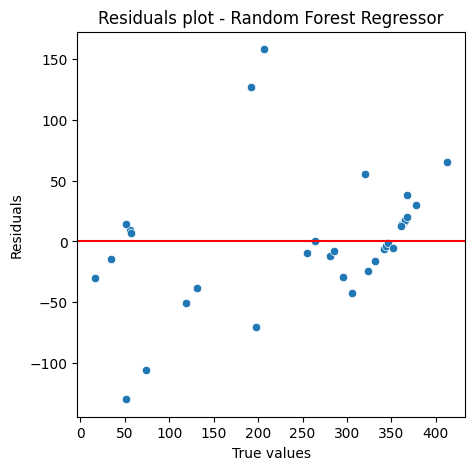

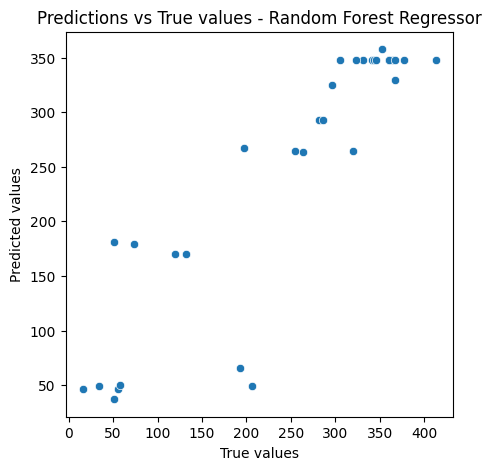

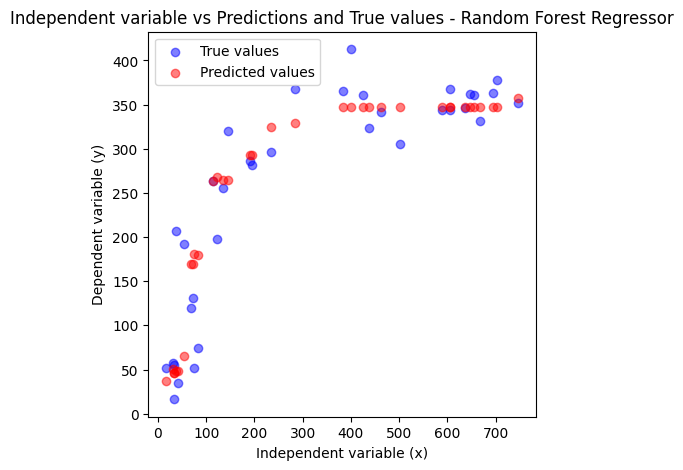


Model: XGBoost Regressor
Train R^2: 0.9399
Test R^2: 0.7865
MSE: 3218.4890
RMSE: 56.7317
MAE: 37.9011


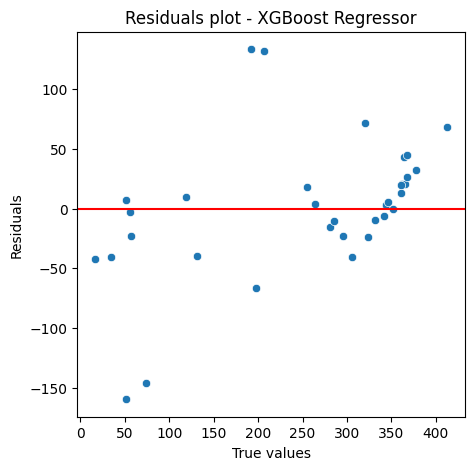

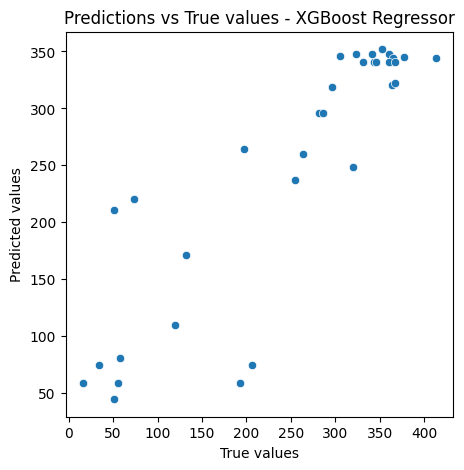

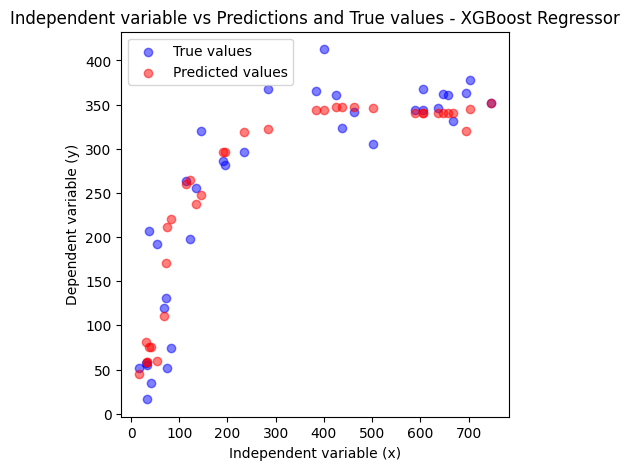

In [19]:
dataframes = [df1, df2, df3]
models = [train_linear_regression, train_knn_regressor, train_random_forest_regressor, train_xgboost_regressor]
model_names = ["Linear Regression", "KNN Regressor", "Random Forest Regressor", "XGBoost Regressor"]

features = ['x']
target = 'y'

for i, df in enumerate(dataframes):
    print(f"Dataset {i + 1}:")

    # Separar características (X) y etiquetas (y)
    X = df[features]
    y = df[target]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = split_data(X, y)

    for model, model_name in zip(models, model_names):
        print(f"\nModel: {model_name}")

        # Entrenar y evaluar el modelo
        trained_model = model(X_train, y_train)
        train_r2, test_r2, mse, rmse, mae = evaluate_regression_model(trained_model, X_train, y_train, X_test, y_test)

        # Imprimir resultados
        print(f"Train R^2: {train_r2:.4f}")
        print(f"Test R^2: {test_r2:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")

        # Graficar residuos, predicciones vs valores reales y variable independiente vs predicciones y valores reales
        y_pred = trained_model.predict(X_test)
        plot_residuals(y_test, y_pred, model_name)
        plot_predictions_vs_true(y_test, y_pred, model_name)
        plot_feature_vs_predictions_and_true(X_test, y_test, y_pred, model_name)

    print("\n" + "="*50 + "\n")